# S03 T01 Visualització gràfica d'un dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('DelayedFlights.csv')
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
#Ens quedem amb les columnes mínimes per realitzar l'exercici:
#ArrTime-> Temps d'arribada en hh:mm
#UniqueCarrier-> Aereolínea
#AirTime-> Duració del vol en minuts
#ArrDelay-> Minuts de retras respecte el temps programat d'arribada (+15 minuts) 
#DepDelay-> Minuts de retras respecte el temps programat de sortida

df = df.drop(['Unnamed: 0','Year', 'Month', 'DayofMonth','Cancelled', 'CancellationCode', 'Diverted','CRSDepTime','CRSArrTime','TailNum','CRSElapsedTime','Origin','Dest','TaxiIn','TaxiOut','NASDelay', 'SecurityDelay','CarrierDelay','WeatherDelay','LateAircraftDelay','DepTime','FlightNum','ActualElapsedTime','Distance','DayOfWeek'], axis = 1)
df

,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay
0,2211.0,WN,116.0,-14.0,8.0
1,1002.0,WN,113.0,2.0,19.0
2,804.0,WN,76.0,14.0,8.0
3,1959.0,WN,77.0,34.0,34.0
4,2121.0,WN,87.0,11.0,25.0
...,...,...,...,...,...
1936753,1617.0,DL,120.0,25.0,30.0
1936754,904.0,DL,78.0,75.0,57.0
1936755,1149.0,DL,122.0,99.0,80.0
1936756,1446.0,DL,89.0,9.0,11.0


In [14]:
df.isnull().sum()

ArrTime          7110
UniqueCarrier       0
AirTime          8387
ArrDelay         8387
DepDelay            0
dtype: int64

In [5]:
df = df.dropna()

ArrTime          0
UniqueCarrier    0
AirTime          0
ArrDelay         0
DepDelay         0
dtype: int64

# Nivell 1
## Exercici 1
**Resumeix gràficament el data set DelayedFlights.csv**

**Crea almenys una visualització per:**


* Una variable categòrica (UniqueCarrier):



Podem veure que existeix molta diversitat de número de vols per a cada aereolínea, però la de WN destaca especialment per tenir una quantitat molt superior a la mitja


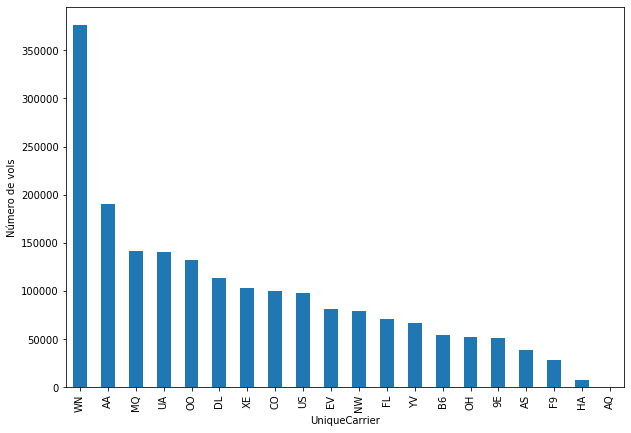

In [6]:
#Seleccionem la columna de 'UniqueValue', comptem el número de vols per cada un i la representem en forma de barres
#perque es vegi més clar

fig1 = df['UniqueCarrier'].value_counts().plot(figsize = (10,7), kind='bar')
plt.xlabel("UniqueCarrier")
plt.ylabel("Número de vols")

print("Podem veure que existeix molta diversitat de número de vols per a cada aereolínea, però la de WN destaca especialment per tenir una quantitat molt superior a la mitja")

* Una variable numèrica (ArrDelay):

Mostrem la informació de la variable amb tres representacions diferents ( boxplot, scatterplot i gràfic de barres)

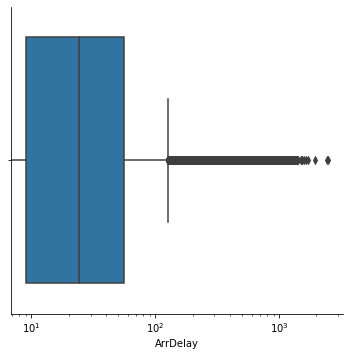

In [30]:
#fig2 = df[['ArrDelay']].boxplot()
fig2 = sns.catplot(x="ArrDelay", kind="box", data=df)
fig2.set(xscale='log')

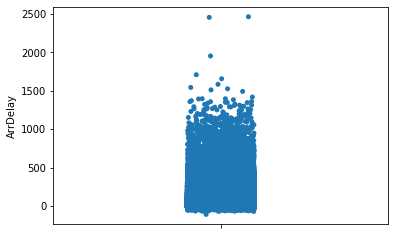

In [53]:
fig21 = sns.stripplot(y="ArrDelay", data=df)

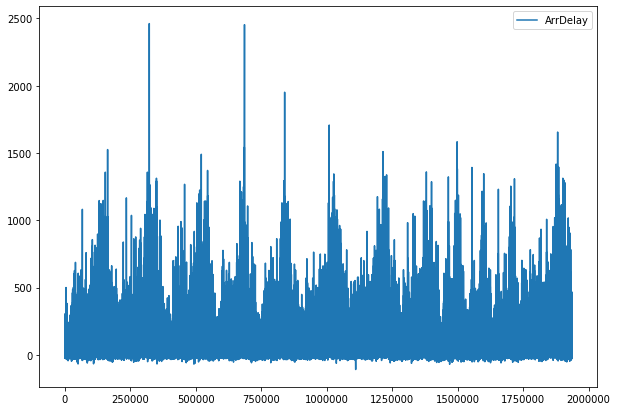

In [23]:
df[['ArrDelay']].plot(figsize = (10,7))


* Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier):
podem veure en aquesta gràfica de tipus boxplot informació per a cada aereolínia 

En aquesta gràfica podem veure 


[None]

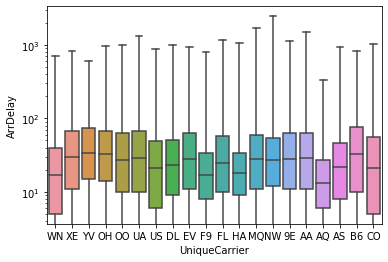

In [34]:
fig3 = sns.boxplot(x="UniqueCarrier", y="ArrDelay", data=df, whis=100)
fig3.set(yscale='log')


* Dues variables numèriques (ArrDelay i DepDelay)


En aquesta gràfica podem veure la distribució que hi ha entre el retràs de l'arribada i de la sortida. Podem concloure que, tot i haver certa relació lineal entre aquestes dues variables, veiem que hi ha un retard molt més superior quan el retard en la sortida en poc o inexistent. Això és degut a que el retard en la sortida únicament depen de si mateixa, mentre que el retard de l'arriba depén també del retard de la sortida, és a dir, que per molt puntual que surti el vol, pot arribar amb retràs igualment, però si ja surt amb x minuts retard, com a mínim haurà d'arribar amb els mateixos minuts de retard


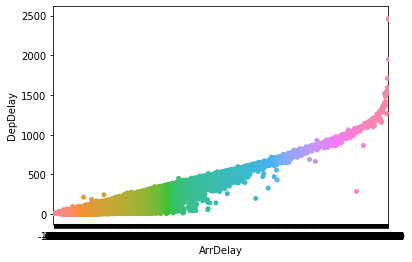

In [28]:
fig4 = sns.stripplot(x="ArrDelay",y="DepDelay",data=df)

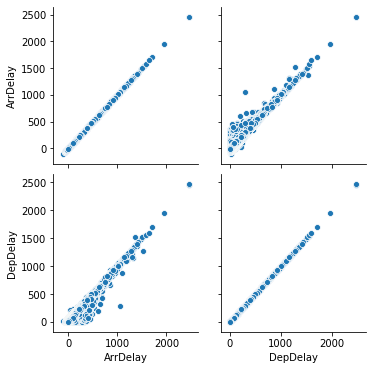

In [8]:
fig41 = sns.PairGrid(df, vars=["ArrDelay", "DepDelay"])
fig41.map(sns.scatterplot)

* Tres variables (ArrDelay, DepDelay i UniqueCarrier)


En aquesta gràfica podem veure la relació entre el retràs de la sortida i el de la arribada, mostra la mateixa informació que la gràfica anterior però amb l'afegit de que podem veure diferenciades les diferents aereolínies.

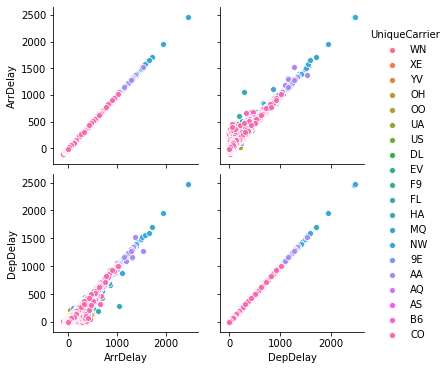

In [50]:
fig5 = sns.PairGrid(df, vars=["ArrDelay", "DepDelay"], hue="UniqueCarrier")
fig5.map(sns.scatterplot).add_legend()

* Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

En aquesta gràfica podem veure la mateixa informació que la gràfica anterior però ara hem afegit la variable "AirTime" (el temps que està volant), i on podem dir que no existeix cap mena de relació entre aquesta variable i la resta.

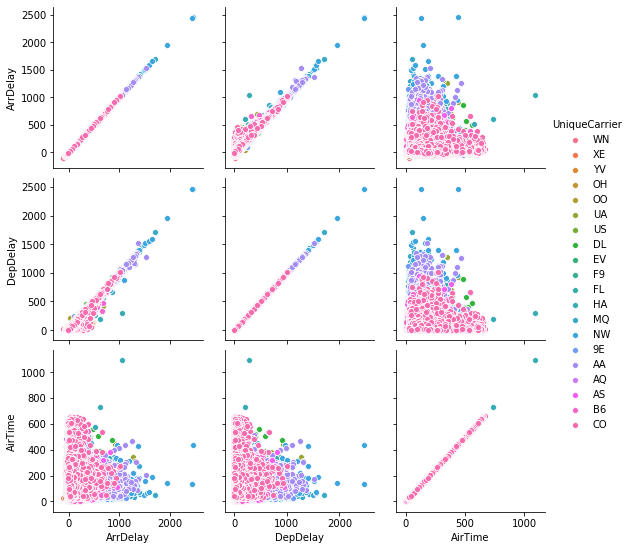

In [52]:
fig6 = sns.PairGrid(df, vars=["ArrDelay","DepDelay","AirTime",],hue="UniqueCarrier")
fig6.map(sns.scatterplot).add_legend()

## Exercici 2
**Exporta els gràfics com imatges o com html.**

In [13]:
plt.savefig('fig1.png')

<Figure size 432x288 with 0 Axes>

## Exercici 3
**Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.**